In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing the dataset

In [2]:
df = pd.read_csv(r"E:\Datasets\Telecom Customers Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Cleaning and filling NA 

In [3]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors ='coerce')

In [4]:
median_val = df['TotalCharges'].median()

In [5]:
df['TotalCharges'] = df['TotalCharges'].fillna(median_val)

#### Adding a new column: "tenure_group"

In [25]:
df['tenure_group'] = pd.cut(df['tenure'],bins=[0, 12, 24, 48, df.tenure.max()],
labels=['0–1 year','1–2 years','2–4 years','4+ years'],include_lowest=True)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,is_churned
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0–1 year,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,2–4 years,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0–1 year,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2–4 years,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0–1 year,1


<Axes: xlabel='Churn', ylabel='count'>

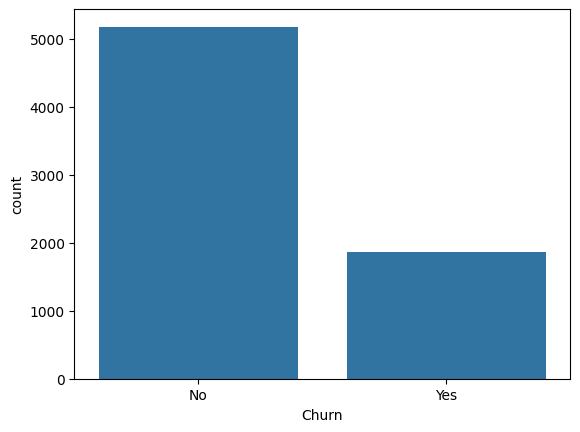

In [8]:
sns.countplot(data=df, x='Churn')

#### Barplot: Contract x Churn

<Axes: xlabel='Contract', ylabel='Churn'>

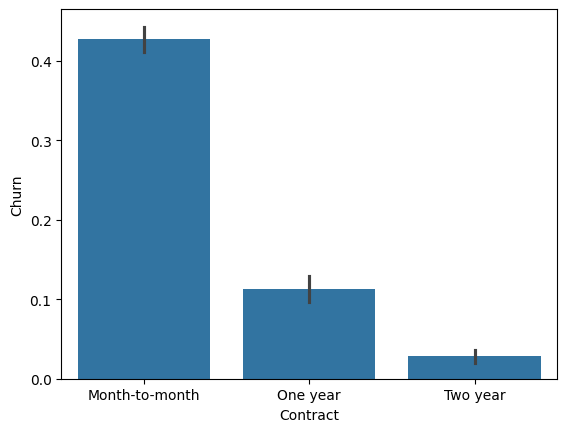

In [9]:
sns.barplot(data=df, x='Contract', y=df['Churn'].map({'Yes':1,'No':0}))

#### Barplot: Tenure group x Churned Customers

<Axes: xlabel='tenure_group', ylabel='Churn'>

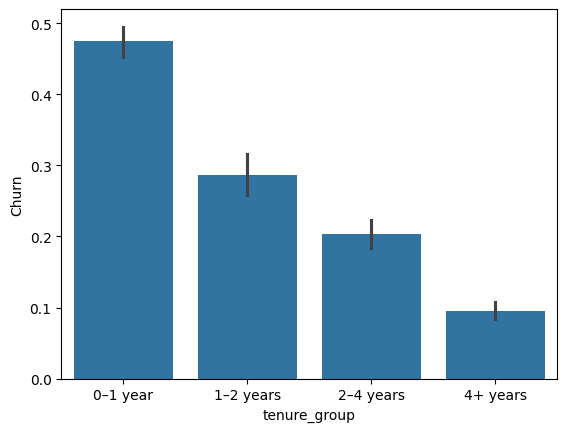

In [10]:
sns.barplot(data=df, x='tenure_group', y=df['Churn'].map({'Yes':1,'No':0}))

#### Boxplot: Monthly charge x Churn

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

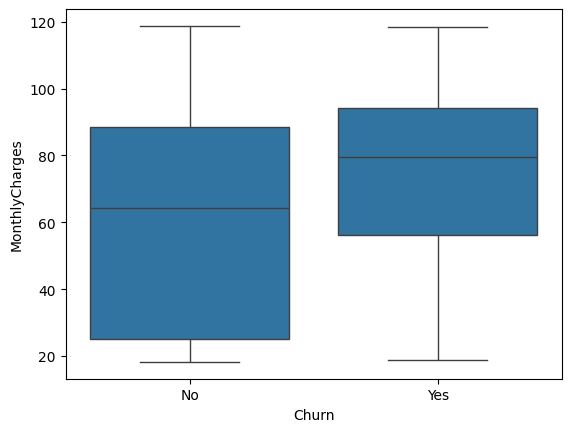

In [11]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')

<Axes: >

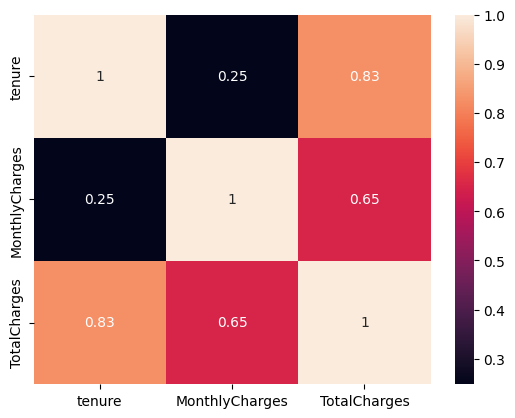

In [12]:
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(), annot=True)

In [13]:
# sns.histplot(df[['tenure','MonthlyCharges','TotalCharges']].corr(), annot=True)

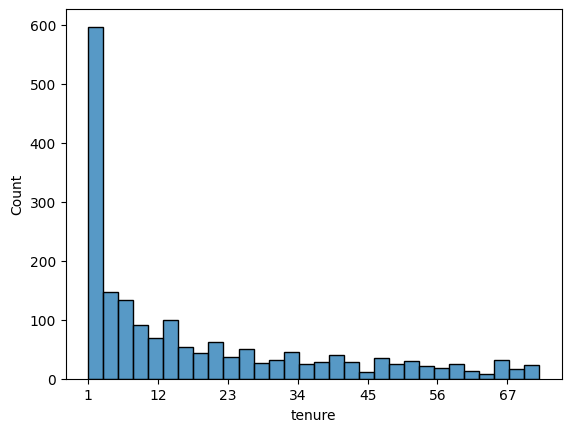

In [14]:
sns.histplot(data=df[df['Churn'] == 'Yes'], x='tenure', bins=30)
plt.xticks(range(1,72,11)) 
plt
plt.show()

In [15]:
df['is_churned'] = df['Churn'].map({'Yes': 1, 'No': 0})

churn_pct = df.groupby('PaymentMethod')['is_churned'].mean() * 100

print(churn_pct.round(2))

PaymentMethod
Bank transfer (automatic)    16.71
Credit card (automatic)      15.24
Electronic check             45.29
Mailed check                 19.11
Name: is_churned, dtype: float64


In [16]:
df.drop(columns ='is_churned').head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0–1 year
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2–4 years
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0–1 year
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2–4 years
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0–1 year


In [17]:
condition = ((df['Contract'] == 'Month-to-month') & 
    (df['MonthlyCharges'] > 70) & 
    (df['Churn'] == 'No'))

result = df[condition][['customerID', 'MonthlyCharges', 'Contract']] \
    .sort_values(by='MonthlyCharges', ascending=False)

print(result.head())

      customerID  MonthlyCharges        Contract
5137  8016-NCFVO          116.50  Month-to-month
1668  9659-QEQSY          115.65  Month-to-month
3856  6710-HSJRD          114.10  Month-to-month
440   0771-WLCLA          112.95  Month-to-month
3820  9481-IEBZY          112.90  Month-to-month


In [18]:
is_churned = df['Churn'].map({'Yes': 1, 'No': 0})

churn_pct =df.groupby('Contract')['is_churned'].mean()*100

print(churn_pct.round(2))

Contract
Month-to-month    42.71
One year          11.27
Two year           2.83
Name: is_churned, dtype: float64


In [19]:
(df['Churn'] == 'Yes').groupby(df['Contract']).mean().mul(100).round(2)

Contract
Month-to-month    42.71
One year          11.27
Two year           2.83
Name: Churn, dtype: float64

In [20]:
df.query("Contract == 'Month-to-month' and MonthlyCharges > 70 and Churn == 'No'")
    [['customerID', 'MonthlyCharges', 'Contract', 'Churn']].sort_values('MonthlyCharges', ascending=False)

IndentationError: unexpected indent (1454515976.py, line 2)